In [4]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, validation_curve, KFold
from matplotlib import pyplot as plt
from sklearn.inspection import permutation_importance
import joblib
import seaborn as sns

# without outliers

In [5]:
pd.set_option('display.max_columns', None)

In [8]:
house_without_outliers_no100 = pd.read_csv('../data/table/data_for_model(no_outliner,no_100).csv')

In [ ]:
house_without_outliers_no100[house_without_outliers_no100['min_mrt'] > 124]

In [ ]:
room2 = house_without_outliers_no100[house_without_outliers_no100['room'] == 2]

In [ ]:
room2

In [ ]:
house_without_outliers_no100[house_without_outliers_no100['floor'] == 0]

In [ ]:
room2['unit_price_ping'].mean()

In [ ]:
house_without_outliers_no100['section'].unique()

#### create column yearMonth

In [9]:
house_without_outliers_no100['yearMonth'] = ""

In [10]:
house_without_outliers_no100['month'] = house_without_outliers_no100['month'].astype(str)

In [11]:
house_without_outliers_no100['month'] = house_without_outliers_no100['month'].apply(lambda x: "0"+x if len(x) == 1 else x)

In [12]:
house_without_outliers_no100['month'].unique()

array(['10', '12', '09', '11', '07', '08', '04', '06', '05', '01', '03',
       '02'], dtype=object)

In [13]:
house_without_outliers_no100['year'] = house_without_outliers_no100['year'].astype(str)

In [14]:
def testfunc(x, y):
    return x + '-' + y

In [15]:
house_without_outliers_no100['yearMonth'] = house_without_outliers_no100.apply(lambda value: testfunc(house_without_outliers_no100['year'], house_without_outliers_no100['month']))

In [16]:
# def testfunc(x, y):
#     return x + '-' + y

In [106]:
for i in range(1, 8):
    print(house_without_outliers_no100[house_without_outliers_no100['yearMonth'] == f"101-0{i}"]['unit_price_ping'].mean())
    print(len(house_without_outliers_no100[house_without_outliers_no100['yearMonth'] == f"101-0{i}"]['unit_price_ping']))

341102.75031764706
17
445185.30041052634
19
386524.46662500006
40
383704.14242692303
52
309457.46754925366
67
300433.9794591716
169
254130.84103876623
1362


In [109]:
house_without_outliers_no100[house_without_outliers_no100['yearMonth'] == "101-01"]

,id,section,parking_space,construction_time,trade_time,age,unit_price_ping,area,trasaction_floor,total_floor,floor,type,room,lr,bath,partition,mgmt,min_inci,min_hos,min_mrt,min_mart,min_gas,min_school,min_park,year,month,yearMonth
718,10240,3,1,1020819,1010105,-2,394854.6694,68.379897,六層,十四層,6,0,4,2,2,1,1,8.810514,0.979776,0.816443,0.286394,0.924007,0.315363,0.121205,101,01,101-01
719,10250,3,1,1020819,1010105,-2,371419.8532,57.590072,十三層,十四層,13,0,4,2,2,1,1,8.816938,0.977592,0.819741,0.282622,0.929486,0.314832,0.119433,101,01,101-01
720,10251,3,1,1020819,1010106,-2,375400.0364,57.538879,十四層,十四層,14,0,4,2,2,1,1,8.816938,0.977592,0.819741,0.282622,0.929486,0.314832,0.119433,101,01,101-01
721,10263,3,1,1020819,1010105,-2,380586.8366,74.227809,八層,十四層,8,0,4,2,2,1,1,8.807908,0.966365,0.809083,0.274964,0.939634,0.303488,0.108115,101,01,101-01
1241,21652,3,0,1021220,1010105,-2,430431.6890,24.626550,十二層,十四層,12,0,2,1,1,1,1,7.588794,1.363777,0.312113,0.228530,0.356941,0.212265,0.205992,101,01,101-01
4823,125652,14,0,880203,1010121,12,153316.3924,13.697230,三層,三十二層,3,0,1,1,1,1,1,22.813339,2.222201,6.949741,1.763712,0.261913,2.105012,1.015257,101,01,101-01
6143,147153,14,1,880625,1010111,12,220281.9830,38.133110,八層,十三層,8,0,4,2,2,1,1,19.151825,1.881041,2.878276,0.326321,0.775695,0.277201,0.540528,101,01,101-01
6175,147644,14,0,880804,1010111,12,220285.2888,46.757760,三層,十層,3,3,4,1,2,1,1,19.004199,2.052517,2.733528,0.455496,0.570845,0.364091,0.356785,101,01,101-01
6296,178779,7,0,620207,1010114,38,578204.2548,32.307070,全,二層,0,2,5,2,3,1,0,1.579679,0.822308,0.643998,0.538255,0.167823,0.082155,0.272524,101,01,101-01
6486,153787,7,0,740812,1010114,26,366877.6840,46.010090,四層,五層,4,1,3,2,2,1,0,1.040710,0.692888,0.627603,0.192753,0.687266,0.392534,0.310882,101,01,101-01


In [111]:
house_without_outliers_no100[house_without_outliers_no100['yearMonth'] == "101-02"]

,id,section,parking_space,construction_time,trade_time,age,unit_price_ping,area,trasaction_floor,total_floor,floor,type,room,lr,bath,partition,mgmt,min_inci,min_hos,min_mrt,min_mart,min_gas,min_school,min_park,year,month,yearMonth
1081,17700,3,0,1030711,1010221,-3,499268.3624,26.338659,十一層,十三層,11,0,2,1,1,1,1,6.729884,0.266968,0.293784,0.347516,0.761005,0.320131,0.158164,101,02,101-02
1085,17708,3,1,1030711,1010221,-3,419958.9146,49.457442,六層,十三層,6,0,3,1,2,1,1,6.729884,0.266968,0.293784,0.347516,0.761005,0.320131,0.158164,101,02,101-02
1086,17710,3,1,1030711,1010224,-3,412279.5412,48.147161,四層,十三層,4,0,3,1,2,1,1,6.729884,0.266968,0.293784,0.347516,0.761005,0.320131,0.158164,101,02,101-02
1090,17721,3,1,1030711,1010220,-3,458438.4266,25.477909,八層,十四層,8,0,1,1,1,1,1,6.727987,0.266679,0.294675,0.345024,0.758072,0.318166,0.155764,101,02,101-02
1091,17722,3,0,1030711,1010228,-3,467678.1376,23.092909,十一層,十四層,11,0,1,1,1,1,1,6.727987,0.266679,0.294675,0.345024,0.758072,0.318166,0.155764,101,02,101-02
1094,17728,3,0,1030711,1010224,-3,420077.9234,22.614954,三層,十四層,3,0,1,1,1,1,1,6.727987,0.266679,0.294675,0.345024,0.758072,0.318166,0.155764,101,02,101-02
1095,17730,3,0,1030711,1010213,-3,425826.7096,22.614935,五層,十四層,5,0,1,1,1,1,1,6.727987,0.266679,0.294675,0.345024,0.758072,0.318166,0.155764,101,02,101-02
1097,17733,3,0,1030711,1010216,-3,414772.1144,22.614930,四層,十四層,4,0,1,1,1,1,1,6.727987,0.266679,0.294675,0.345024,0.758072,0.318166,0.155764,101,02,101-02
6798,161408,7,1,1021226,1010203,-2,409079.5268,46.445950,五層,十九層,5,0,3,2,2,1,1,1.837046,1.015420,0.713288,0.432924,0.449077,0.058387,0.234569,101,02,101-02
6800,161417,7,0,1021226,1010203,-2,397952.2040,42.718890,二層,十九層,2,0,3,2,2,1,1,1.829717,1.014602,0.715619,0.428211,0.443915,0.065976,0.238060,101,02,101-02


In [112]:
house_without_outliers_no100[house_without_outliers_no100['yearMonth'] == "101-03"]

,id,section,parking_space,construction_time,trade_time,age,unit_price_ping,area,trasaction_floor,total_floor,floor,type,room,lr,bath,partition,mgmt,min_inci,min_hos,min_mrt,min_mart,min_gas,min_school,min_park,year,month,yearMonth
1078,17697,3,1,1030711,1010311,-3,440048.2612,45.267966,七層,十三層,7,0,3,1,2,1,1,6.729884,0.266968,0.293784,0.347516,0.761005,0.320131,0.158164,101,03,101-03
1088,17717,3,0,1030711,1010317,-3,456805.3614,22.745019,九層,十四層,9,0,1,1,1,1,1,6.727987,0.266679,0.294675,0.345024,0.758072,0.318166,0.155764,101,03,101-03
1089,17720,3,0,1030711,1010316,-3,380094.2724,24.336177,二層,十四層,2,0,1,1,1,1,1,6.727987,0.266679,0.294675,0.345024,0.758072,0.318166,0.155764,101,03,101-03
1092,17725,3,1,1030711,1010311,-3,485132.7616,35.660502,十四層，見其他登記事項,十四層,14,0,2,1,2,1,1,6.727987,0.266679,0.294675,0.345024,0.758072,0.318166,0.155764,101,03,101-03
1093,17727,3,0,1030711,1010328,-3,449638.3870,22.862920,十層,十四層,10,0,1,1,1,1,1,6.727987,0.266679,0.294675,0.345024,0.758072,0.318166,0.155764,101,03,101-03
1238,21624,3,0,1021220,1010307,-2,397129.0598,19.338888,七層,十四層,7,0,1,1,1,1,1,7.588794,1.363777,0.312113,0.228530,0.356941,0.212265,0.205992,101,03,101-03
1240,21638,3,0,1021220,1010328,-2,349403.2252,14.396040,八層,十四層,8,0,1,1,1,1,1,7.588794,1.363777,0.312113,0.228530,0.356941,0.212265,0.205992,101,03,101-03
1242,21656,3,0,1021220,1010326,-2,439780.4914,19.441605,十三層,十四層,13,0,1,1,1,1,1,7.588794,1.363777,0.312113,0.228530,0.356941,0.212265,0.205992,101,03,101-03
1243,21669,3,0,1021220,1010319,-2,385257.9320,19.441608,三層,十四層,3,0,1,1,1,1,1,7.588794,1.363777,0.312113,0.228530,0.356941,0.212265,0.205992,101,03,101-03
1244,21682,3,0,1021220,1010327,-2,359201.6164,17.538976,四層,十四層,4,0,1,1,1,1,1,7.588794,1.363777,0.312113,0.228530,0.356941,0.212265,0.205992,101,03,101-03


In [113]:
house_without_outliers_no100[house_without_outliers_no100['yearMonth'] == "101-04"]

,id,section,parking_space,construction_time,trade_time,age,unit_price_ping,area,trasaction_floor,total_floor,floor,type,room,lr,bath,partition,mgmt,min_inci,min_hos,min_mrt,min_mart,min_gas,min_school,min_park,year,month,yearMonth
130,1173,1,0,840715,1010415,16,164400.7398,41.119221,十四層,十六層,14,0,4,2,2,1,1,3.404937,2.196112,6.159962,0.316566,0.083247,0.253872,0.232791,101,04,101-04
516,4933,2,0,851219,1010401,15,71838.3398,38.976577,五層,八層,5,3,3,2,1,1,0,18.864340,5.172242,11.843176,9.324834,0.744110,0.223659,0.227905,101,04,101-04
983,16589,3,0,1011031,1010426,-1,268057.4046,40.290059,九層,十層,9,3,3,2,2,1,1,8.635804,1.455116,1.080314,0.525848,0.671512,0.726854,0.139126,101,04,101-04
985,16595,3,0,1011031,1010425,-1,259971.4178,43.197251,十層，夾層,十層,10,3,3,2,2,1,1,8.635804,1.455116,1.080314,0.525848,0.671512,0.726854,0.139126,101,04,101-04
1087,17716,3,0,1030711,1010417,-3,430249.8700,22.614867,七層,十四層,7,0,1,1,1,1,1,6.727987,0.266679,0.294675,0.345024,0.758072,0.318166,0.155764,101,04,101-04
1096,17732,3,0,1030711,1010417,-3,425383.7324,22.614977,六層,十四層,6,0,1,1,1,1,1,6.727987,0.266679,0.294675,0.345024,0.758072,0.318166,0.155764,101,04,101-04
1239,21629,3,1,1021220,1010423,-2,325928.7394,22.366953,九層,十四層,9,0,1,1,1,1,1,7.588794,1.363777,0.312113,0.228530,0.356941,0.212265,0.205992,101,04,101-04
1245,21683,3,0,1021220,1010409,-2,386381.9040,25.053046,四層,十四層,4,0,2,1,1,1,1,7.588794,1.363777,0.312113,0.228530,0.356941,0.212265,0.205992,101,04,101-04
1246,21733,3,0,670811,1010425,33,165290.0000,19.360000,四層，陽台,五層,4,1,2,1,1,1,0,7.543446,1.375486,0.357590,0.273590,0.386708,0.254659,0.160392,101,04,101-04
3168,65634,8,1,870921,1010421,13,244427.5462,83.869810,五層，六層,六層,5,3,4,3,4,1,1,3.623767,0.454597,0.697857,0.573393,0.448482,0.697308,0.176811,101,04,101-04


In [18]:
house_without_outliers_no100 = house_without_outliers_no100[~house_without_outliers_no100['section'].isin([12, 13, 21, 25, 27])]

In [19]:
house_without_outliers_no100['section'].unique()

array([ 1,  2,  3,  5,  6,  8, 10, 14,  7, 18, 15, 19, 22, 23, 24, 20, 16,
       26,  4, 28,  9], dtype=int64)

In [20]:
# house_without_outliers_no100['yearMonthtest'] = ""
# house_without_outliers_no100['yearMonthtest'] = house_without_outliers_no100.apply(lambda value: testfunc(house_without_outliers_no100['year'], house_without_outliers_no100['month']))

In [21]:
yearMonth = house_without_outliers_no100['yearMonth'].reset_index(drop = True)

In [22]:
year = house_without_outliers_no100['year'].reset_index(drop = True)

In [23]:
house_without_outliers_no100.columns

Index(['id', 'section', 'parking_space', 'construction_time', 'trade_time',
       'age', 'unit_price_ping', 'area', 'trasaction_floor', 'total_floor',
       'floor', 'type', 'room', 'lr', 'bath', 'partition', 'mgmt', 'min_inci',
       'min_hos', 'min_mrt', 'min_mart', 'min_gas', 'min_school', 'min_park',
       'year', 'month', 'yearMonth'],
      dtype='object')

In [24]:
house_without_outliers_no100['section'].unique()

array([ 1,  2,  3,  5,  6,  8, 10, 14,  7, 18, 15, 19, 22, 23, 24, 20, 16,
       26,  4, 28,  9], dtype=int64)

In [25]:
house_without_outliers_no100_indata = house_without_outliers_no100.drop(columns = {'id', 'construction_time', 'trade_time', 'trasaction_floor', 'total_floor', 'year', 'month', 'yearMonth'})

In [26]:
house_without_outliers_no100_indata.columns

Index(['section', 'parking_space', 'age', 'unit_price_ping', 'area', 'floor',
       'type', 'room', 'lr', 'bath', 'partition', 'mgmt', 'min_inci',
       'min_hos', 'min_mrt', 'min_mart', 'min_gas', 'min_school', 'min_park'],
      dtype='object')

In [27]:
house_without_outliers_no100_indata.shape

(221501, 19)

# without outliers

In [28]:
# without get_dummies
X = house_without_outliers_no100_indata.drop(columns = {'unit_price_ping'})
Y = house_without_outliers_no100_indata['unit_price_ping']

# split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

# standardscaler
train_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_nor = train_scaler.transform(X_train)
scaler = preprocessing.StandardScaler().fit(X)
X_nor = scaler.transform(X)

# set regressor
regressor = xgb.XGBRegressor(
    n_estimators = 1500,
    max_depth = 7, 
    n_jobs = -1, 
    learning_rate = 0.1
)

regressor.fit(X_train_nor, Y_train)
# X_test_nor = scaler.transform(X_test)
Y_pred = regressor.predict(X_nor)

# print(f"without_outliers_r2: {r2_score(Y_test, Y_pred)}")
# print(f"without_outliers_mse: {mean_squared_error(Y_test, Y_pred)}")
# print(f"without_outliers_rmse: {mean_squared_error(Y_test, Y_pred, squared = False)}")
# print(f"without_outliers_mae: {mean_absolute_error(Y_test, Y_pred)}")

# # with get_dummies
# X = house_without_outliers_no100_gd.drop(columns = {'unit_price_ping'})
# Y = house_without_outliers_no100_gd['unit_price_ping']

# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# # standardscaler
# scaler = preprocessing.StandardScaler().fit(X_train)
# X_train_nor = scaler.transform(X_train)

# # set regressor
# regressor = xgb.XGBRegressor(
#     n_estimators = 1000,
#     max_depth = 5, 
#     n_jobs = -1
# )

# regressor.fit(X_train_nor, Y_train)
# X_test_nor = scaler.transform(X_test)
# Y_pred = regressor.predict(X_test_nor)

# print(f"with_get_dummies_r2: {r2_score(Y_test, Y_pred)}")
# print(f"with_get_dummies_mse: {mean_squared_error(Y_test, Y_pred)}")
# print(f"with_get_dummies_rmse: {mean_squared_error(Y_test, Y_pred, squared = False)}")
# print(f"with_get_dummies_mae: {mean_absolute_error(Y_test, Y_pred)}")

# 整份資料畫趨勢圖和特徵權重

In [29]:
Y_pred

array([195037.38, 231161.61, 214579.4 , ..., 145162.25, 222199.  ,
       201683.06], dtype=float32)

In [30]:
Y_pred = pd.Series(Y_pred)

In [31]:
Y_pred

0         195037.375000
1         231161.609375
2         214579.406250
3         221579.406250
4         221276.109375
              ...      
221496    211806.218750
221497    163348.625000
221498    145162.250000
221499    222199.000000
221500    201683.062500
Length: 221501, dtype: float32

In [32]:
X_data = X.reset_index(drop = True)

In [33]:
whole_data = pd.concat([X_data, Y_pred], axis = 1)

In [34]:
whole_data = pd.concat([whole_data, yearMonth], axis = 1)

In [35]:
whole_data

,section,parking_space,age,area,floor,type,room,lr,bath,partition,mgmt,min_inci,min_hos,min_mrt,min_mart,min_gas,min_school,min_park,0,yearMonth
0,1,0,23,51.373997,0,2,6,1,3,1,0,5.289176,2.136603,4.675329,1.778556,1.982863,0.413375,0.091651,195037.375000,101-10
1,1,0,3,72.364574,0,2,4,3,4,1,1,6.228412,2.206407,3.732542,2.628068,2.828270,0.299191,0.335365,231161.609375,101-12
2,1,1,0,79.551239,0,2,5,2,4,1,0,6.412179,2.229165,3.523136,2.476814,2.995116,0.393358,0.494201,214579.406250,101-09
3,1,1,0,80.815769,0,2,5,2,4,1,0,6.411096,2.227065,3.523009,2.477876,2.993802,0.393365,0.494690,221579.406250,101-10
4,1,1,0,77.706827,0,2,5,2,4,1,0,6.409919,2.224749,3.522849,2.479032,2.992369,0.393364,0.495219,221276.109375,101-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221496,23,0,24,27.811940,4,3,3,2,2,1,1,14.559923,7.253931,4.494443,1.968091,2.390621,1.562047,1.879605,211806.218750,110-03
221497,23,1,24,50.375160,3,0,3,2,2,1,1,13.698958,8.115385,4.322924,1.099002,1.486816,0.900904,1.005336,163348.625000,110-03
221498,23,0,37,21.489460,3,1,2,2,1,1,0,11.778665,6.847308,2.359782,0.794523,0.691259,1.979402,1.898044,145162.250000,110-01
221499,23,0,26,16.540680,3,3,1,1,1,1,1,14.317320,7.841208,4.983899,1.499488,2.037043,1.107122,1.426402,222199.000000,110-05


In [36]:
real_data_groupby = house_without_outliers_no100.groupby('yearMonth')

In [37]:
real_data_groupby.size()

yearMonth
101-01      17
101-02      19
101-03      40
101-04      52
101-05      67
          ... 
110-01     635
110-02    1133
110-03    2392
110-04    1931
110-05     478
Length: 113, dtype: int64

In [38]:
real_data_mean_list = []
for i in real_data_groupby.size().index.tolist():
    mean = real_data_groupby.get_group(i)['unit_price_ping'].mean()
    real_data_mean_list.append(mean)

In [39]:
predict_data_groupby = whole_data.groupby('yearMonth')
predict_data_groupby.size()
predict_data_mean_list = []
for i in predict_data_groupby.size().index.tolist():
    mean = predict_data_groupby.get_group(i)[0].mean()
    predict_data_mean_list.append(mean)

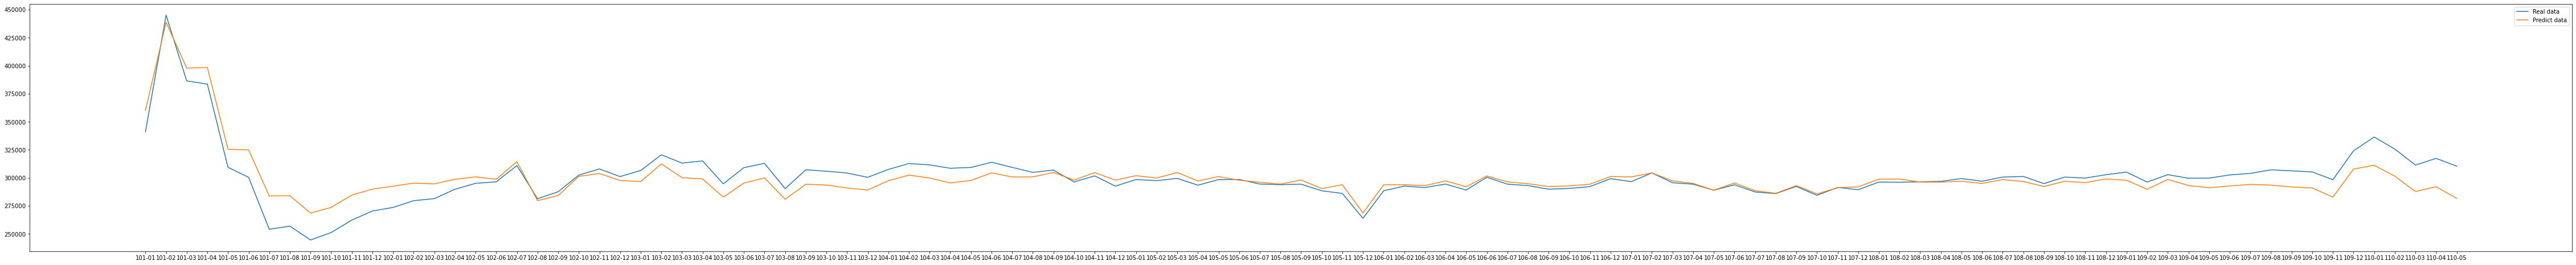

In [47]:
plt.figure(figsize = (80,8))
plt.plot(real_data_groupby.size().index, real_data_mean_list, label = 'Real data')
plt.plot(predict_data_groupby.size().index, predict_data_mean_list, label = 'Predict data')
plt.legend()
plt.show()


In [ ]:
sorted_idx = regressor.feature_importances_.argsort()

In [ ]:
plt.barh(X_train.columns[sorted_idx], regressor.feature_importances_[sorted_idx])

In [ ]:
joblib.dump(regressor, 'Model')

In [ ]:
joblib.load('Model')

# 各區畫特徵權重

In [ ]:
house_model = joblib.load('Model')

In [ ]:
house_model

In [ ]:
house_model.feature_importances_

In [ ]:
# group by each section
groupby_section = house_without_outliers_no100_indata.groupby('section')
groupby_section.size()

#### 計算各區r2(use house_model)

In [ ]:
num = 0
for i in groupby_section.size().index:
    for_each_section_X = groupby_section.get_group(i).drop('unit_price_ping', axis = 1)
    for_each_section_Y = groupby_section.get_group(i)['unit_price_ping']
    scaler = preprocessing.StandardScaler().fit(for_each_section_X)
    for_each_section_X_nor = scaler.transform(for_each_section_X)
    for_each_section_Y_pred = house_model.predict(for_each_section_X_nor)
    
#     if r2_score(for_each_section_Y, for_each_section_Y_pred) < 0.6:
    print(f"section{i}_r2: {r2_score(for_each_section_Y, for_each_section_Y_pred)}")
    num += 1
print(num)

# 畫各區correlation matrix

In [ ]:
groupby_section.get_group(1)

In [ ]:
corr_matrix = groupby_section.get_group(1).drop('section', axis = 1).corr()

In [ ]:
corr_matrix

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(corr_matrix, annot = True)

# 去極端值、無get_dummies、無調參 畫圖

# method1 to calculate importance feature

In [ ]:
test = permutation_importance(regressor, X_test_nor, Y_test)

In [ ]:
test_sorted_idx = test.importances_mean.argsort()
plt.figure(figsize = (8,8))
plt.barh(X.columns[test_sorted_idx], test.importances_mean[test_sorted_idx])

# method2 to calculate importance feature

In [ ]:
regressor.feature_importances_

In [ ]:
sorted_idx = regressor.feature_importances_.argsort()

In [ ]:
plt.figure(figsize = (8,8))
plt.barh(X.columns[sorted_idx], regressor.feature_importances_[sorted_idx])
plt.xlabel('xgboost feature importance')

In [ ]:
import seaborn as sns

In [ ]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(X_train[X_train.columns[sorted_idx]])

In [ ]:
correlation_heatmap(X_train[X_train.columns[test_sorted_idx]])

# Loss function

In [ ]:
# split data
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size = 0.2)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_nor = scaler.transform(X_train)
X_test_nor = scaler.transform(X_test)


# error list
n = [10, 100, 150, 300, 500, 600, 700, 800 ,1001]
training_errors = []
test_errors = []
test_r2s = []


for estimators in n :
    loss_regressor = xgb.XGBRegressor(
        n_estimators = estimators,
        max_depth = 4,
        n_jobs = -1
    )
    
    loss_regressor.fit(X_train_nor, Y_train)
    Y_pred_train = loss_regressor.predict(X_train_nor)
    Y_pred_test = loss_regressor.predict(X_test_nor)
    
    training_err = mean_squared_error(Y_train, Y_pred_train)
    training_errors.append(training_err)
    test_err = mean_squared_error(Y_test, Y_pred_test)
    test_errors.append(test_err)
    test_r2 = r2_score(Y_test, Y_pred_test)
    test_r2s.append(test_r2)

In [ ]:
error_table = pd.DataFrame()
error_table['n'] = n
error_table['training_error'] = training_errors
error_table['test_error'] = test_errors
error_table['r2'] = test_r2s
error_table

In [ ]:
plt.plot(error_table['n'], error_table['training_error'], label = 'Training Error')
plt.plot(error_table['n'], error_table['test_error'], label = 'Test Error')
plt.figure(figsize = (8,8))
plt.show()

# 各區初始r2

In [ ]:
house_without_outliers_no100['section'].unique()

In [ ]:
groupby_section = house_without_outliers_no100.groupby('section')

In [ ]:
groupby_section.size()

In [ ]:
a = 0
for i in range(1, 29):
    if i not in (11, 17):
        data = groupby_section.get_group(i)
        X = data.drop('unit_price_ping', axis = 1)
        Y = data['unit_price_ping']
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)
        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train_nor = scaler.transform(X_train)
        X_test_nor = scaler.transform(X_test)
        regressor = xgb.XGBRegressor(
            n_estimators = 1000, 
            max_depth = 7,
            learning_rate = 0.05,
            n_jobs = -1
        )
        
        regressor.fit(X_train_nor, Y_train)
        Y_pred = regressor.predict(X_test_nor)
        
#         print(f"section{i}_rmse: {mean_squared_error(Y_test, Y_pred, squared = False)}")
#         print(f'section{i}_r2: {r2_score(Y_test, Y_pred)}')
        if r2_score(Y_test, Y_pred) < 0.5 :
            print(f'section{i}_r2: {r2_score(Y_test, Y_pred)}')
            a += 1
print(a)

In [ ]:
house_without_outliers = house_without_outliers_no100[~house_without_outliers_no100['section'].isin([12, 13, 21, 27])]

In [ ]:
house_without_outliers.shape

In [ ]:
house = house_without_outliers.groupby('section')

In [ ]:
house.size().index.tolist()

In [ ]:
a = 0
total = 0
for i in range(1,2):
    total += 1
    data = house.get_group(i)
    X = data.drop('unit_price_ping', axis = 1)
    Y = data['unit_price_ping']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_nor = scaler.transform(X_train)
    X_test_nor = scaler.transform(X_test)
    regressor = xgb.XGBRegressor(
        n_estimators = 1000, 
        max_depth = 7,
        learning_rate = 0.05,
        n_jobs = -1
    )

    regressor.fit(X_train_nor, Y_train)
    Y_pred = regressor.predict(X_test_nor)

#         print(f"section{i}_rmse: {mean_squared_error(Y_test, Y_pred, squared = False)}")
#         print(f'section{i}_r2: {r2_score(Y_test, Y_pred)}')
    if r2_score(Y_test, Y_pred) < 0.5 :
        print(f'section{i}_r2: {r2_score(Y_test, Y_pred)}')
        
        a += 1
    print(len(Y_pred))
    print(Y_pred)
print(f"total: {total}")
print(f"r2 < 0.5: {a}")

In [ ]:
X

# app.py


In [ ]:
house_model = joblib.load('finalized_model.sav')
house_model

In [ ]:
house_without_outliers.columns

In [ ]:
X = pd.Series([1, 0, 23, 34, 5, 0, 3, 1, 2, 0, 0, 1, 0.5, 0.9, 0.5, 0.2, 0.1, 0.3])

In [ ]:
X = X.to_numpy()

In [ ]:
X = X.reshape(1, 18)

In [ ]:
X = pd.DataFrame(X)

In [ ]:
X.rename(columns = {0: 'section', 1: 'parking_space', 2: 'age', 3: 'area', 4: 'floor', 5: 'type', 6: 'room', 7: 'lr', 8: 'bath', 9: 'partition', 10: 'mgmt', 11: 'min_inci', 12: 'min_hos', 13: ''})

In [ ]:
scaler = preprocessing.StandardScaler().fit(X) 

In [ ]:
X_nor = scaler.transform(X)

In [ ]:
X_nor.shape

In [ ]:
Y_pred = house_model.predict(X_nor)